In [1]:
import pandas as pd
from tools import *
from CONSTANT import *
import os

import matplotlib.pyplot as plt

%matplotlib inline

# HKU956

In [2]:
av_rating = pd.read_csv(r'./HKU956/3. AV_ratings_duration.csv')
av_rating.head()

,participant_id,song_no,song_id,valence_rating,valence,arousal_rating,arousal,play_duration
0,hku1919,16,370177,9.3,positive,1.0,positive,72
1,hku1919,8,1119687,9.8,positive,-3.0,negative,73
2,hku1919,18,77933,-0.1,negative,1.9,positive,41
3,hku1919,14,238585,1,positive,-1.8,negative,66
4,hku1919,20,1168711,0.2,positive,-3.4,negative,33


In [3]:
users = os.listdir(HKU_DIR)
hku_data = {}
for user in users:
    songs = []
    hku_data[user] = {}
    for signal_name in SIGNALS:
        signal_files = get_folder_files(os.path.join(HKU_DIR, user, signal_name))
        signal_processer(user, signal_name, signal_files)
        # if signal_name == 'BVP':
        #     pass
        # elif signal_name == 'EDA':
        #     pass
        # elif signal_name == 'TEMP':
        #     pass
        # elif signal_name == 'HR':
        #     pass
        # else: # IBI
        #     pass
        # hku_data[user][signal] = get_folder_files(os.path.join(HKU_DIR, user, signal))

NameError: name 'signal_processer' is not defined

In [4]:
def signal_processer(user, signal_name, signal_files, win_size, step):
    all_signals = {}
    tmp_signals = []
    for file in signal_files:
        try:
            filename = os.path.split(file)[-1]
            filename, file_extension = os.path.splitext(filename)
            if file_extension != '.csv':
                continue
            # songno, songid = filename.split('_')
            
            signal = pd.read_csv(file, header=None).iloc[:,0].values

            # bandpass or lowpass filtering
            if signal_name == 'EDA':
                signal = butter_lowpass_filter(signal, cutOff=CUTOFF['EDA'], fs=SAMPLERATE['EDA'])
                signal = resample_by_interpolation(signal, input_fs=SAMPLERATE['EDA'], output_fs=100)
            elif signal_name in ['TEMP', 'BVP']:
                signal = butter_bandpass_filter(signal, lowcut=CUTOFF[signal_name][0], highcut=CUTOFF[signal_name][1], fs=SAMPLERATE[signal_name])

                signal = resample_by_interpolation(signal, input_fs=SAMPLERATE[signal_name], output_fs=100)

            else: # HR, IBI
                signal = iqr_filter(pd.Series(signal)).values
                if signal_name == 'HR':
                    signal = resample_by_interpolation(signal, input_fs=SAMPLERATE[signal_name], output_fs=100)

            tmp_signals.extend(signal.tolist())
            all_signals[filename] = signal
            
        except Exception as e:
            print(e, file)
        
        signal_max = np.max(tmp_signals)
        signal_min = np.min(tmp_signals)

        # resampling, normalization & segmentation
        for song_no, signal in all_signals.items():
            signal = (signal-np.min(tmp_signals))/(np.max(tmp_signals)-np.min(tmp_signals))
    


In [2]:
hr_262957 = pd.read_csv(r'./HKU956/1. physiological_signals/hku1903/HR/0_262957.csv', header=None).iloc[:,0].values

In [6]:
ibi_262957 = pd.read_csv(r'./HKU956/1. physiological_signals/hku1903/IBI/0_262957.csv', header=None).iloc[:,0].values

In [5]:
len(hr_262957)

147

In [7]:
len(ibi_262957)

40

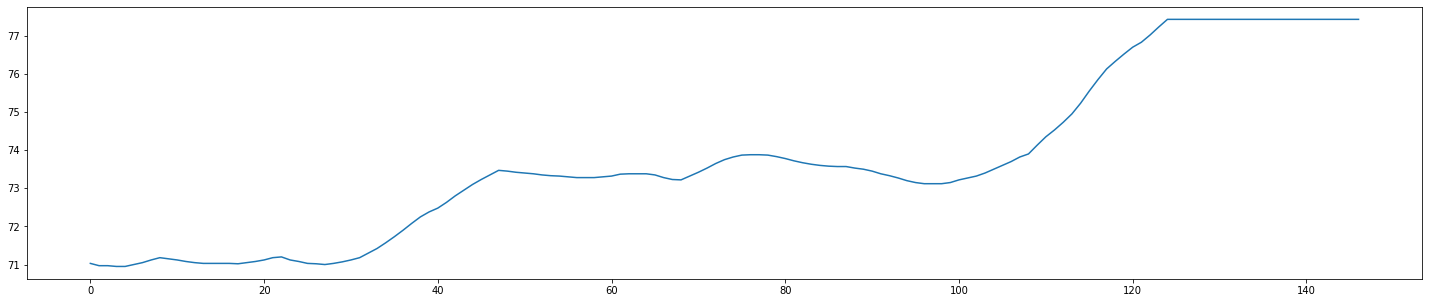

In [6]:
plot_sig(iqr_filter(pd.Series(hr_262957)).values)

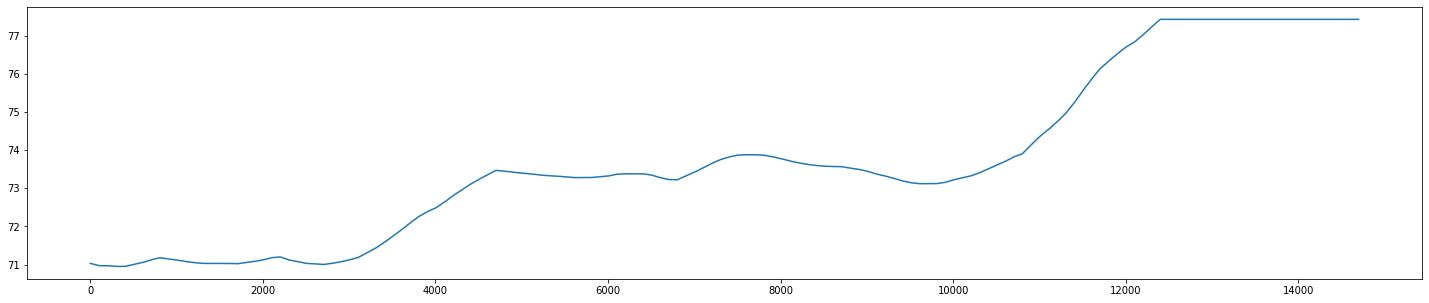

In [4]:
plot_sig(resample_by_interpolation(iqr_filter(pd.Series(hr_262957)).values, 1, 100))

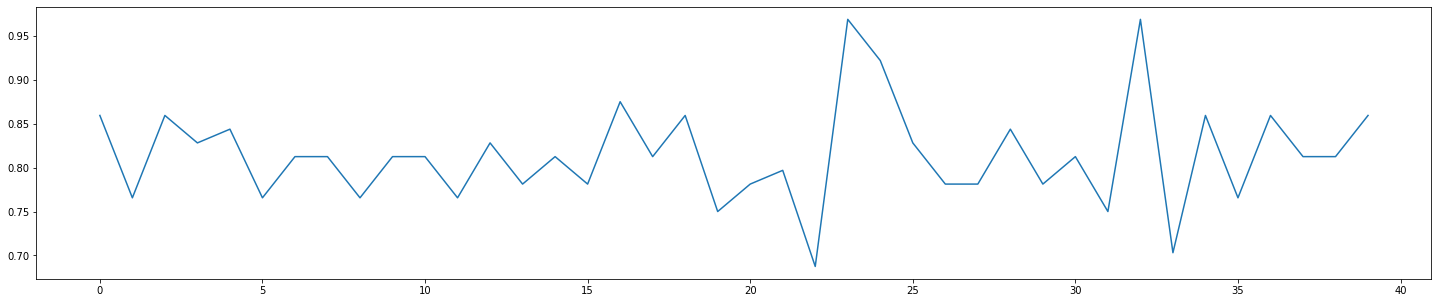

In [20]:
plot_sig(hr_262957)

In [17]:
hr_262957

array([0.859414, 0.76566 , 0.859414, 0.828163, 0.843789, 0.76566 ,
       0.812537, 0.812537, 0.76566 , 0.812537, 0.812537, 0.76566 ,
       0.828163, 0.781286, 0.812537, 0.781286, 0.87504 , 0.812537,
       0.859414, 0.750034, 0.781286, 0.796911, 0.687531,      nan,
       0.921917, 0.828163, 0.781286, 0.781286, 0.843789, 0.781286,
       0.812537, 0.750034,      nan, 0.703157, 0.859414, 0.76566 ,
       0.859414, 0.812537, 0.812537, 0.859414])